In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import requests  # used later to download additional data
import sqlite3

- [`pandas` Cheat Sheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)
- [`matplotlib` Cheat Sheet](https://matplotlib.org/cheatsheets/_images/cheatsheets-1.png)
- [SQL Cheat Sheet](https://www.sqltutorial.org/sql-cheat-sheet/)

# Loading the data

In [2]:
df = pd.read_csv('https://drive.switch.ch/index.php/s/UEpTFv2Bfa5C1dd/download')
df.head()

,playerShort,player,club,leagueCountry,birthday,height,weight,position,games,victories,...,rater2,refNum,refCountry,Alpha_3,meanIAT,nIAT,seIAT,meanExp,nExp,seExp
0,lucas-wilchez,Lucas Wilchez,Real Zaragoza,Spain,31.08.1983,177.0,72.0,Attacking Midfielder,1,0,...,0.50,1,1,GRC,0.326391,712.0,0.000564,0.396000,750.0,0.002696
1,john-utaka,John Utaka,Montpellier HSC,France,08.01.1982,179.0,82.0,Right Winger,1,0,...,0.75,2,2,ZMB,0.203375,40.0,0.010875,-0.204082,49.0,0.061504
2,abdon-prats,Abdón Prats,RCD Mallorca,Spain,17.12.1992,181.0,79.0,NaN,1,0,...,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002
3,pablo-mari,Pablo Marí,RCD Mallorca,Spain,31.08.1993,191.0,87.0,Center Back,1,1,...,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002
4,ruben-pena,Rubén Peña,Real Valladolid,Spain,18.07.1991,172.0,70.0,Right Midfielder,1,1,...,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002


We repeat our simple data cleaning here, by getting rid of all `NaN` values.

In [3]:
df = df.dropna()

# Task 1.1 - Scatter Plot
Create a Scatter Plot of player weight vs. height.

*Hint*: Check the [`pandas` cheat sheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf) for plotting with `pandas`.

Based on the plot alone, do you think there is a correlation between the two? How can you tell from the plot?

**Bonus**: Do the same with `matplotlib`. You can find the cheat sheet for it [here](https://matplotlib.org/cheatsheets/_images/cheatsheets-1.png).

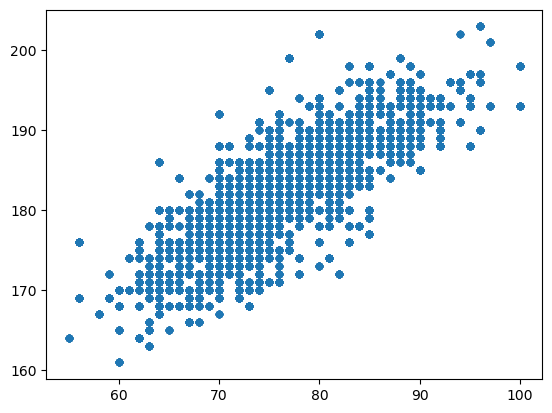

In [4]:
#in diesem Fall positive Korrelation
#beide Funktionen erstellen mehr oder weniger den gleichen Graf

#df.plot.scatter(x='weight', y='height')
#plt.scatter(df.weight, df.height, s=18)
plt.scatter(df['weight'], df['height'], s=18)
plt.show()

# Task 1.2 - Data Manipulation
Create a new column, called Name Length, that contains the length of the player's name.

*Hint*: Split this into two steps:

* creating a new column (check the `pandas` cheat sheet or last week's notebook if you don't remember how to do this)
* calculating the length of the player's name **for each row**
    
*Hint2*: If you have trouble with calculating the length of the player's name, have a look at the *Summarize Data* section in the cheat sheet.

In [5]:
def foo (x):
    #das ist praktisch für ausführlichere Berechnungen
    return len(x)

df['NameLength'] = df.player.apply(len)
df['NameLength'] = df.player.apply(foo)
df['NameLength'] = df.player.apply(lambda x: len(x))
df['NameLength'] = df['player'].apply(lambda x: len(x))

df

,playerShort,player,club,leagueCountry,birthday,height,weight,position,games,victories,...,refNum,refCountry,Alpha_3,meanIAT,nIAT,seIAT,meanExp,nExp,seExp,NameLength
0,lucas-wilchez,Lucas Wilchez,Real Zaragoza,Spain,31.08.1983,177.0,72.0,Attacking Midfielder,1,0,...,1,1,GRC,0.326391,712.0,0.000564,0.396000,750.0,0.002696,13
1,john-utaka,John Utaka,Montpellier HSC,France,08.01.1982,179.0,82.0,Right Winger,1,0,...,2,2,ZMB,0.203375,40.0,0.010875,-0.204082,49.0,0.061504,10
5,aaron-hughes,Aaron Hughes,Fulham FC,England,08.11.1979,182.0,71.0,Center Back,1,0,...,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752,12
6,aleksandar-kolarov,Aleksandar Kolarov,Manchester City,England,10.11.1985,187.0,80.0,Left Fullback,1,1,...,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752,18
7,alexander-tettey,Alexander Tettey,Norwich City,England,04.04.1986,180.0,68.0,Defensive Midfielder,1,0,...,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146022,tom-huddlestone,Tom Huddlestone,Tottenham Hotspur,England,28.12.1986,188.0,80.0,Defensive Midfielder,1,0,...,3147,21,HUN,0.376127,574.0,0.000714,0.498350,606.0,0.002968,15
146023,tomas-rosicky,Tomáš Rosický,Arsenal FC,England,04.10.1980,178.0,67.0,Attacking Midfielder,1,1,...,3147,21,HUN,0.376127,574.0,0.000714,0.498350,606.0,0.002968,13
146024,winston-reid,Winston Reid,West Ham United,England,03.07.1988,190.0,87.0,Center Back,1,0,...,3147,21,HUN,0.376127,574.0,0.000714,0.498350,606.0,0.002968,12
146025,xherdan-shaqiri,Xherdan Shaqiri,Bayern München,Germany,10.10.1991,169.0,72.0,Left Midfielder,1,1,...,3147,21,HUN,0.376127,574.0,0.000714,0.498350,606.0,0.002968,15


# Task 1.3 - Scatter Plot
Create a Scatter Plot of player **weight** vs. **name length**. Do you see a correlation between the two **visually**? Why or why not? What makes this plot different from the one of weight vs height?

*Hint*: You can do this exactly the same way as you did in Task 1.1. Solve that task first and then this one is essentially free.

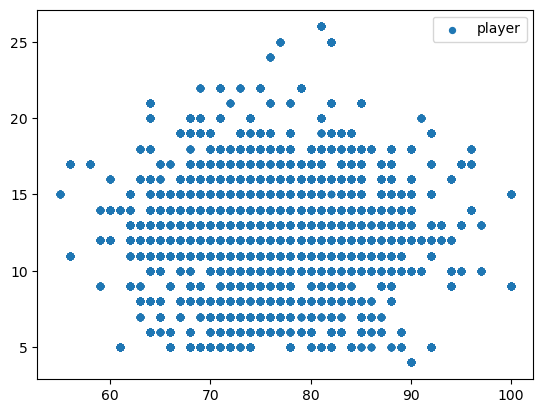

In [6]:
#df.plot.scatter(x='weight', y='NameLength')
#df.plot
plt.scatter(df['weight'], df['NameLength'], s=18, label='player')
plt.legend()
plt.show()

# Task 1.4 - Linear Regression
Create a linear regression model that predicts the player's height based on the player's weight. What is the height of a player that weighs 80kg? What is the height of a player that weighs 100kg?

*Hint 1*: For the linear regression, use [`scikit-learn` and its `LinearRegression` model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

*Hint 2*: You have to reshape your data. You can do this with the `numpy.reshape` function. Have a look at the [`reshape` function](https://numpy.org/doc/stable/reference/generated/numpy.reshape.html) for how to continue from there.

The task of linear regression is to find the solution to the mapping:

$ f(X) = AX + b $

* `X` is the training data: usually a matrix with the features as columns and the rows the examples
* `A` is the linear mapping matrix (also called the _coefficient_)
* `b` is the offset (also called _intercept_)
* `f` is the function to map the training data to the target `y`


Note, that `X` is a matrix, however, the `weight` is a column vector, so you have to reshape it to a matrix.

Try using it first without reshaping and understand the occuring error message.

In [7]:
from sklearn.linear_model import LinearRegression

# X is the name of the features
# y is the name of the targets
X = df['weight'].values.reshape(-1, 1)
y = df['height'].values.reshape(-1, 1)

model = LinearRegression()
model.fit(X, y)
model.predict(
    [[80], [100]]
)

array([[184.80521209],
       [199.9036292 ]])

In [8]:
foo = df['weight'].values.reshape(-1,1)
foo.shape

(115457, 1)

In [9]:
# the coefficient:
print(model.coef_)

[[0.75492086]]


In [10]:
# the intercept:
print(model.intercept_)

[124.41154362]


In [11]:
A = model.coef_
b = model.intercept_

def f(X):
    return A * X + b

X = np.array([[80], [100], [225000]])

preds  = f(X)

print(preds)

[[   184.80521209]
 [   199.9036292 ]
 [169981.60409578]]


# Task 1.5 - Scatter Plot with Regression Line
Create a Scatter Plot of player weight vs. height. Draw the regression line into the scatter plot.

*Hint*: You can use `plt.plot` to draw the regression line. Have a look at the [documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) for how to use it. If you didn't do the bonus part of Task 1.1, you can have a look at the [`matplotlib cheat sheet`](https://matplotlib.org/cheatsheets/_images/cheatsheets-1.png).

*Hint2*: You can easily find the x-axis values. How can you get the y-axis values for the regression line? You already did this in a previous task!

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


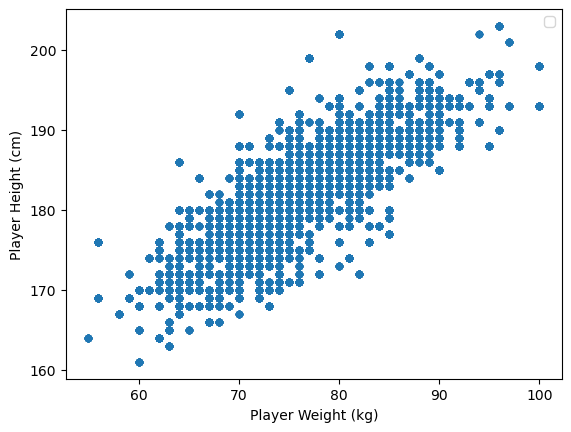

In [12]:
plt.scatter(df['weight'], df['height'], s=18)

plt.xlabel('Player Weight (kg)')
plt.ylabel('Player Height (cm)')
plt.legend()

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


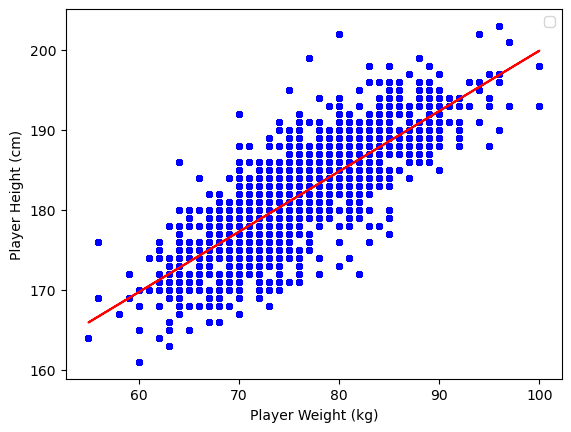

In [13]:
X = df['weight'].values.reshape(-1, 1)
Y = df['height'].values.reshape(-1, 1)

model.fit(X, Y)

regressionLine = model.predict(X)

plt.scatter(X, Y, s=15, color='blue')
plt.plot(X, regressionLine, color='red')

plt.xlabel('Player Weight (kg)')
plt.ylabel('Player Height (cm)')
plt.legend()

plt.show()

**Bonus**: Repeat this for height vs. name length.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


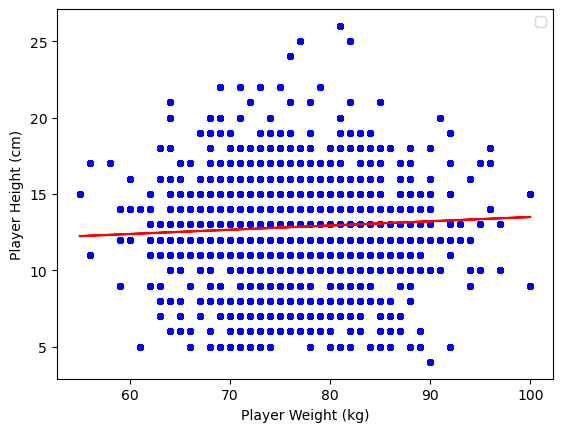

In [14]:
X = df['weight'].values.reshape(-1, 1)
Y = df['NameLength'].values.reshape(-1, 1)

model.fit(X, Y)

regressionLine = model.predict(X)

plt.scatter(X, Y, s=15, color='blue')
plt.plot(X, regressionLine, color='red')

plt.xlabel('Player Weight (kg)')
plt.ylabel('Player Height (cm)')
plt.legend()

plt.show()

# Task 2.1 - SQL Query on DataFrame
Write a query that returns the player's weight, height, and position from the DataFrame, using SQL.

*Hint*: You need to use the [`read_sql`](https://pandas.pydata.org/docs/reference/api/pandas.read_sql.html) function.

You can find an SQL cheat sheet [here](https://www.sqltutorial.org/sql-cheat-sheet/).

In [15]:
from sqlite3 import connect as sql3

with sql3.connect('E03_crowdstorming.db') as sql_conn:
    df.to_sql('E03_crowdstorming', sql_conn, if_exists="replace")

conn = sql3.connect('./E03_crowdstorming.db')

pd.read_sql(
    '''SELECT player, weight, height
       FROM E03_crowdstorming
    ''',
    conn
)

conn.close()

AttributeError: 'builtin_function_or_method' object has no attribute 'connect'

We will be using [`sqlalchemy`](https://www.sqlalchemy.org/) here. First we store the data from the DataFrame in a sqlite3 database.

You can find an `sqlalchemy` cheat sheet [here](https://www.pythonsheets.com/notes/python-sqlalchemy.html).

In [ ]:
with sqlite3.connect('crowdstorming.db') as c:
    df.to_sql('crowdstorming', c, if_exists="replace")

from sqlalchemy import create_engine, MetaData

engine = create_engine('sqlite:///crowdstorming.db')
metadata = MetaData()
metadata.reflect(engine)

table_names = metadata.tables.keys()
print(table_names)

# Task 3.1 - Loading additional data

To enrich our data we will collect information about the countries. For this we will use an API.

- Make a GET request to https://restcountries.com/v3.1/all. You can use the [`requests` library](https://requests.readthedocs.io/en/latest/user/quickstart/) for this.
- Create a DataFrame called `countries_df` from the response
- Alternative: Load the data from the file `countries.json` (in case the API dies)
- You may need either [`pd.DataFrame.from_records`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.from_records.html), [`pd.read_json`](https://pandas.pydata.org/docs/reference/api/pandas.read_json.html).

# Task 3.2 - Data Cleaning
The `'name'` column contains dictionaries. This makes it annoying for us to work with.
Simplify the column by replacing all entries in it with the value in `'common'` in that dictionary.

*Hint*: You did something very similar in Task 1.2!

In [ ]:
# use this if the API is not working or dies
countries_df = pd.read_json('https://drive.switch.ch/index.php/s/x0zUM0seQqigcU1/download')

# Task 3.3 - Joining DataFrames

Combine the two DataFrames on the `leagueCountry` column. You can use [`pd.merge`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html) for this.
For the DataFrame with the countries, you only need the `name` and `fifa` columns.

Here is how we can do it with SQLAlchemy.
First we save the data from the DataFrame in the database.

In [ ]:
from sqlalchemy.orm import sessionmaker

with sqlite3.connect("./crowdstorming.db") as c:
    countries_df[['name', 'fifa', 'unMember']].to_sql('countries', c, if_exists="replace")

metadata = MetaData()
metadata.reflect(engine)
countries_table = metadata.tables['countries']
crowdstorming_table = metadata.tables['crowdstorming']
Session = sessionmaker(bind=engine)
session = Session()
results = session.query(countries_table).all()
print(results[:5])

Then we do the join, but with SQLAlchemy.

In [ ]:
results = (
    session
    .query(
        crowdstorming_table.c,
        countries_table.c.fifa
    )
    .join(
        countries_table,
        crowdstorming_table.c.leagueCountry == countries_table.c.name
    )
    .all()
)
len(results)

# Task 4 - Joining with SQL

First we save the data from the DataFrame in the database.

In [ ]:
with sqlite3.connect("./crowdstorming.db") as c:
    countries_df[['name', 'fifa', 'unMember']].to_sql('countries', c, if_exists="replace")

# Task 4.1 - Joining crowdstorming data and country data with SQL

Select all columns from the `crowdstorming` table, and only the `fifa` column from the `countries` table.
Then join the two tables on the `leagueCountry` column of the `crowdstorming` table and the `name` column of the `countries` table.


And here is how we can do the same with SQLAlchemy.

In [ ]:
results = (
    session
    .query(
        crowdstorming_table.c,
        countries_table.c.fifa
    )
    .join(
        countries_table,
        crowdstorming_table.c.leagueCountry == countries_table.c.name
    )
    .all()
)
print(results[0])

# Task 5 - Calculating the mean

Calculate the mean height and weight of each player in the database.


Now repeat this, but on the DataFrame. Are the results the same?

And the solution with SQLAlchemy:

In [ ]:
from sqlalchemy import func
# calculate the mean height and weight in the database
results = session.query(
    func.avg(crowdstorming_table.c.height),
    func.avg(crowdstorming_table.c.weight)
).all()

print(results)

# Task 6 - Calculating the mean per position

Calculate the mean height and weight of each player per position in the database.

Now do the same with the DataFrame. Are the results the same?

And the solution with SQLAlchemy:

In [ ]:
# calculate mean height and weight PER POSITION in the database
results = (
    session.query(
        crowdstorming_table.c.position,
        func.avg(crowdstorming_table.c.height),
        func.avg(crowdstorming_table.c.weight)
    )
    .group_by(crowdstorming_table.c.position)
    .all()
)
results

# Task 7 - Calculating the mean per position and league
Calculate the mean height and weight of each player per position and per league in the database.

Now do the same with the DataFrame. Are the results the same?

And the solution with SQLAlchemy:

In [ ]:
# calculate mean height and weight PER POSITION and PER LEAGUE in the database
results = (
    session
    .query(
        crowdstorming_table.c.position,
        crowdstorming_table.c.leagueCountry,
        func.avg(crowdstorming_table.c.height),
        func.avg(crowdstorming_table.c.weight)
    )
    .group_by(crowdstorming_table.c.position, crowdstorming_table.c.leagueCountry)
    .all()
)
results